In [1]:
import torch
import numpy as np
from ANN_model import Features12_NN, Features12_NN2
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

c:\Users\smcmlab4\Anaconda3\envs\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 64
RANDOM_STATE = 42
CLEANED = True

if CLEANED:
    X = np.load('Numeric_feature_dataset/features12_train_cleaned.npy')
    y = np.load('Numeric_feature_dataset/target_train_cleaned.npy')
    print('Using cleaned data')
else:
    X = np.load('Numeric_feature_dataset/features12_train.npy')
    y = np.load('Numeric_feature_dataset/target_train.npy')

train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Using cleaned data
Total num of data: 11750


In [3]:
model = Features12_NN2()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=1000, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=50, threshold=0.001)

[Epoch 1/1000] train_loss: 0.040653, test_loss: 0.024411 | train_mape: 32.5962, test_mape: 27.7395
[Epoch 2/1000] train_loss: 0.023069, test_loss: 0.021703 | train_mape: 26.4074, test_mape: 24.0542
[Epoch 3/1000] train_loss: 0.018147, test_loss: 0.013470 | train_mape: 22.9835, test_mape: 18.7442
[Epoch 4/1000] train_loss: 0.013109, test_loss: 0.011919 | train_mape: 19.5691, test_mape: 20.6214
[Epoch 5/1000] train_loss: 0.012413, test_loss: 0.010686 | train_mape: 19.1436, test_mape: 17.0867
[Epoch 6/1000] train_loss: 0.011641, test_loss: 0.011399 | train_mape: 18.5901, test_mape: 17.6599
[Epoch 7/1000] train_loss: 0.010865, test_loss: 0.011607 | train_mape: 17.8197, test_mape: 19.1119
[Epoch 8/1000] train_loss: 0.011401, test_loss: 0.009810 | train_mape: 18.2188, test_mape: 16.9832
[Epoch 9/1000] train_loss: 0.010727, test_loss: 0.009963 | train_mape: 17.8462, test_mape: 17.2063
[Epoch 10/1000] train_loss: 0.010453, test_loss: 0.010663 | train_mape: 17.3781, test_mape: 17.2702
[Epoch 11

In [4]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/features12_model9.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

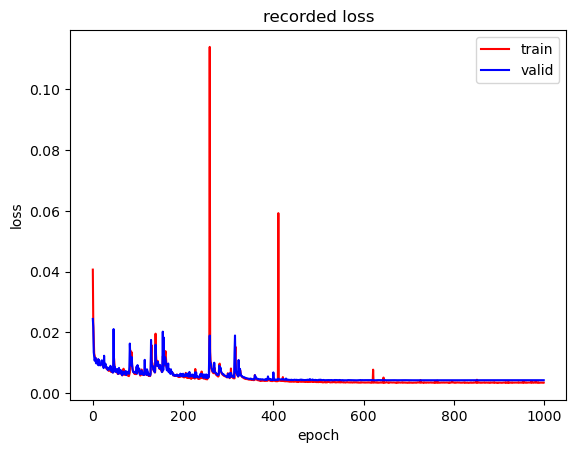

In [5]:
loss_plot(trainloss, testloss)

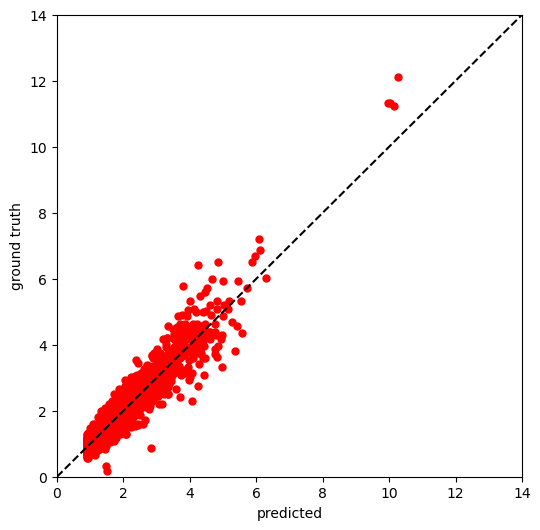

In [6]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

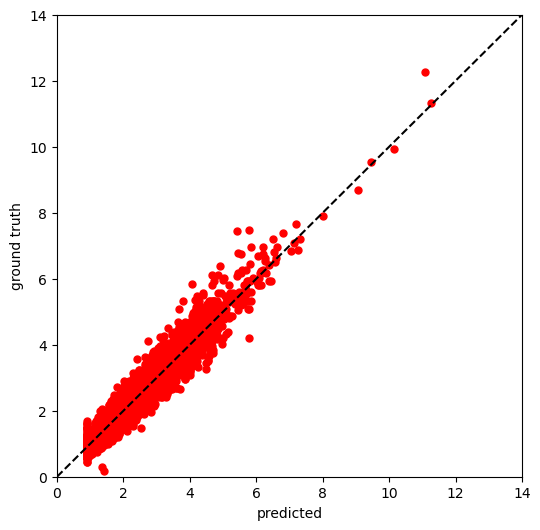

In [7]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)